
--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


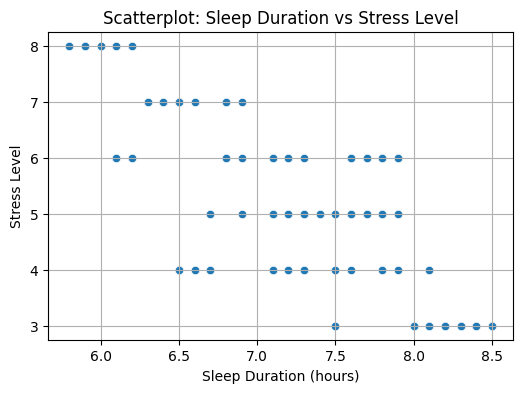

In [12]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Sleep_Health_and_Lifestyle_Dataset.csv")

# ====== 1. Info Dataset ======
print("\n--- Info Dataset ---")
print(df.info())

# ====== 2. Statistik Deskriptif ======
print("\n--- Statistik Deskriptif ---")
print(df.describe())

# ====== 3. Scatterplot Sleep Duration vs Stress Level ======
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Sleep Duration"], y=df["Stress Level"])
plt.title("Scatterplot: Sleep Duration vs Stress Level")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Stress Level")
plt.grid(True)
plt.show()


In [16]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("Sleep_Health_and_Lifestyle_Dataset.csv")

# Pilih variabel X dan y
X = df[["Sleep Duration"]]   # variabel independen
y = df["Stress Level"]       # variabel dependen

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Prediksi di data test
y_pred = model.predict(X_test)

# Evaluasi model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Evaluasi Model ===")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Koefisien & Intercept
print("\n=== Persamaan Regresi ===")
print(f"Intercept (a): {model.intercept_:.4f}")
print(f"Koefisien (b): {model.coef_[0]:.4f}")
print(f"Persamaan: Stress Level = {model.intercept_:.4f} + {model.coef_[0]:.4f} * Sleep Duration")


=== Evaluasi Model ===
R-squared (R²): 0.7083
Root Mean Squared Error (RMSE): 0.9546

=== Persamaan Regresi ===
Intercept (a): 18.1659
Koefisien (b): -1.7963
Persamaan: Stress Level = 18.1659 + -1.7963 * Sleep Duration


In [17]:
import joblib

# Simpan model ke file .pkl
joblib.dump(model, "regresi_sleep_stress.pkl")
print("✅ Model berhasil disimpan ke file: regresi_sleep_stress.pkl")

# Contoh cara load model lagi
loaded_model = joblib.load("regresi_sleep_stress.pkl")

# Uji prediksi (misal: tidur 7 jam)
test_value = [[7.0]]
prediction = loaded_model.predict(test_value)
print(f"Prediksi Stress Level jika tidur 7 jam: {prediction[0]:.2f}")


✅ Model berhasil disimpan ke file: regresi_sleep_stress.pkl
Prediksi Stress Level jika tidur 7 jam: 5.59


c:\Users\HD\miniforge3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
